<a href="https://colab.research.google.com/github/kecosz/rELA/blob/main/rELA0_53_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial for rELA 0.53
### Notes:

### 0.46
*Formatting* now works even if "basemetadata" is not given. Also, in *Formatting*, the parameter for specifying whether normalization is performed changed from "normalizeq" to "normalize".

## Setup

In [91]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

## rpy2 version specification
### Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel
%load_ext rpy2.ipython

###The following codes is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [92]:
%%R
# [for Google Colab]
# from v0.50, Due to errors in installing igraph and tidygraph
#system("add-apt-repository -y ppa:marutter/rrutter4.0")
#system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+")
#system("add-apt-repository ppa:cran/v8")
#system("apt-get update")
#system("apt-get install libnode-dev")
#system("apt-get install r-cran-igraph r-cran-tidygraph")

NULL


In [93]:
%%R
## package instllation
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('plyr')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
install.packages("stringdist")
install.packages("purrr")
install.packages("plot3D")
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('plyr')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
library("stringdist")
library("purrr")
library("plot3D")


In [94]:
## Doanload rELA package
!rm -r rELA
!git clone https://github.com/kecosz/rELA.git

Cloning into 'rELA'...
remote: Enumerating objects: 861, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (240/240), done.
remote: Total 861 (delta 370), reused 409 (delta 289), pack-reused 332 (from 1)
Receiving objects: 100% (861/861), 8.80 MiB | 19.39 MiB/s, done.
Resolving deltas: 100% (428/428), done.


In [95]:
%%R
# install rELA package
install.packages("rELA/rELA.v0.53.tar.gz")
library("rELA")

In [96]:
#%%R
# To completely refresh the library functions without restarting runtime, please reinstall rELA after executing the following.
#detach("package:rELA", unload=TRUE)
#remove.packages("rELA")

NULL


## Energy Landscape Analysis

### Download data

In [97]:
%%R
# Specify the path for your own data in the code below, if necessary.
baseabtable <- read.csv('rELA/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('rELA/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")

In [98]:
%%R
head(basemetadata, 7)

         factor.1   factor.2
sample.1    -0.92 2.79692115
sample.2     0.34 2.14701252
sample.3    -0.92 1.60611363
sample.4    -0.24 0.58476465
sample.5     0.40 1.73161379
sample.6    -0.82 2.95971753
sample.7     0.36 0.07787331


In [99]:
%%R
# To group species with the same presence/absence pattern into one group,
#set grouping to 1 and specify a number between 0 and 1 for grouping_th.
# If 0, only species with the same presence/absence pattern will be grouped together.
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata=NULL, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


### Parameter fitting

In [156]:
%%R
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)
sa <- runSA(ocmat=as.matrix(ocmat), qth=10^-5, rep=256, threads=1)


Start parameter fitting:
................................................................................................................................................................................................................................................................SA: elapsed time 40.88 sec



In [157]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [158]:
%%R
he

  species.12   species.16    species.7    species.5    species.2   species.10 
-0.763129272 -0.485320936 -0.317162180 -0.416573399 -0.954413662 -1.077580585 
   species.8   species.11   species.15    species.6    species.4   species.14 
 0.251475682 -0.500388299 -0.123596715 -0.072344873  1.403226603  0.109190584 
   species.3   species.13    species.1    species.9 
 0.071316381  0.002986775  0.995211715  0.915438435 


In [159]:
%%R
hge

  species.12   species.16    species.7    species.5    species.2   species.10 
-0.763129272 -0.485320936 -0.317162180 -0.416573399 -0.954413662 -1.077580585 
   species.8   species.11   species.15    species.6    species.4   species.14 
 0.251475682 -0.500388299 -0.123596715 -0.072344873  1.403226603  0.109190584 
   species.3   species.13    species.1    species.9 
 0.071316381  0.002986775  0.995211715  0.915438435 


### Analysis and visualization of energy landscape
#### ELA function

In [160]:
%%R
ela <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- the number of steps for finding stable states and tipping points (basically no need to change)
                threads=2, reporting=TRUE)

Start ELA:
7 stable states were found.
Checking 21 tipping points.
converting...
ELA: elapsed time 1.43 sec


In [161]:
%%R
elap <- ELPruning(ela, th=0.05)

Start pruning:
*......
ELPruning: elapsed time 0.52 sec


*ATTENTION*  
The return value of ELPruning is a list consisting of two elements, the first of which takes the same form as ELA, and the second of which indicates the correspondence between the stable states before and after pruning.

In [162]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- elap[[1]]

Stable states

In [163]:
%%R
stablestates

[1] "09x" "EWB" "1uV"


Convert an integer representing a stable state (ssid) to a binary vector

In [164]:
%%R
# ssid -> binary vector
bin = as.list(lapply(stablestates, function(x){id2bin(x, ncol(ocmat))}))
names(bin) <- stablestates
bin

$`09x`
 [1] 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1

$EWB
 [1] 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1

$`1uV`
 [1] 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1



Convert a binary vector to a ssid

In [165]:
%%R
# binary vector -> ssid
as.vector(sapply(bin, bin2id))

[1] "09x" "EWB" "1uV"


Table of SSID, Energy, Community composition

In [166]:
%%R
sstable(elap[[1]]) # or sstable(ela)

   ID            Energy species.12 species.16 species.7 species.5 species.2
1 09x -12.7164952086794          0          0         0         0         0
2 EWB -10.8489210785749          1          1         1         0         1
3 1uV -9.87345936363313          0          0         0         1         1
  species.10 species.8 species.11 species.15 species.6 species.4 species.14
1          0         1          0          0         1         1          1
2          0         0          0          0         0         0          0
3          1         1          0          0         0         0          1
  species.3 species.13 species.1 species.9
1         1          0         1         1
2         1          0         1         1
3         1          1         1         1


Export the table to Google Drive in CSV format

In [111]:
%%R
write.csv(x = sstable, file="drive/MyDrive/colab_export/sstable.csv") # "sstable.csv" is saved in "colab_export" folder of your Google Drive.

ID and energy of tipping points

In [167]:
%%R
as.data.frame(tippingpoints)

   X1  X2  X3
1 Inf 4eB 0uV
2 Inf Inf 4eB
3 Inf Inf Inf


In [168]:
%%R
as.data.frame(tippingen)

   X1        X2        X3
1 Inf -7.160553 -9.111547
2 Inf       Inf -7.160553
3 Inf       Inf       Inf


Table of TPID, SSID1, SSID2, Energy, Community composition

In [169]:
%%R
tptable(elap[[1]])

   TP SS1 SS2            Energy species.12 species.16 species.7 species.5
1 4eB EWB 09x -7.16055347214323          0          1         0         0
2 0uV 1uV 09x -9.11154742743679          0          0         0         0
3 4eB 1uV EWB -7.16055347214323          0          1         0         0
  species.2 species.10 species.8 species.11 species.15 species.6 species.4
1         1          0         1          0          0         0         0
2         1          1         1          0          0         0         0
3         1          0         1          0          0         0         0
  species.14 species.3 species.13 species.1 species.9
1          0         1          0         1         1
2          1         1          1         1         1
3          0         1          0         1         1


Energy of any community composition


In [170]:
%%R
cEnergy(ocmat[1,], he, je)

[1] -2.940886


Find the stable state for a community composition

In [171]:
%%R
Bi(ocmat[1,], he, je)

[[1]]
[1] "01t"

[[2]]
[1] -11.57964



### Principal component analysis  
Observed community compositions plotted on a PC1,2 plane and color-coded by their stable states

NULL


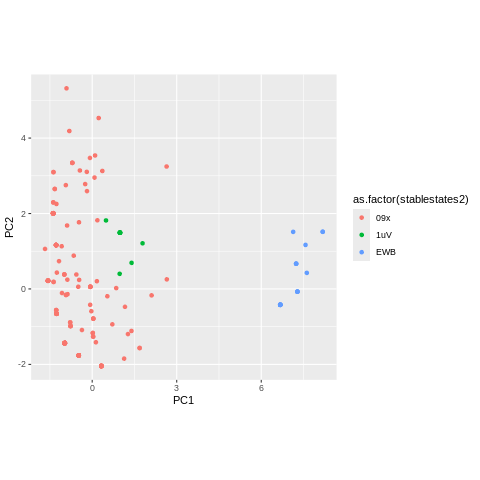

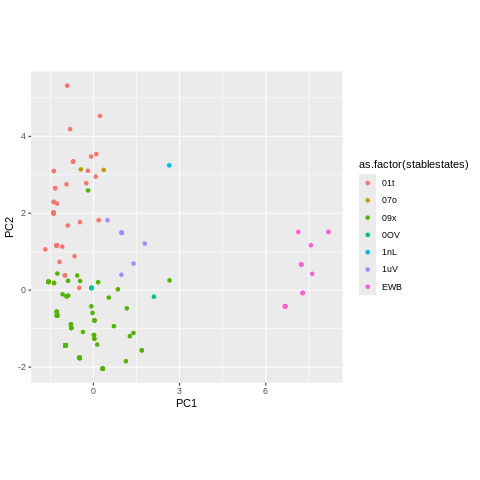

In [172]:
%%R
PCplot(ocmat, sa, ssrep=elap[[2]])
PCplot(ocmat, sa, ssrep=elap[[2]], pruned=FALSE)

Disconnectivity graph


NULL


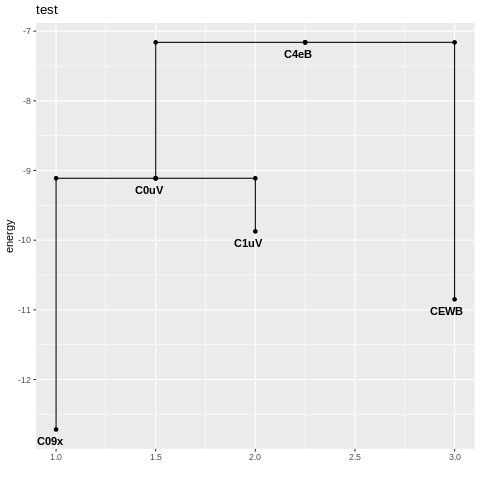

In [173]:
%%R
showDG(elap[[1]], ocmat, "test")

### Visualization of species' interaction

NULL


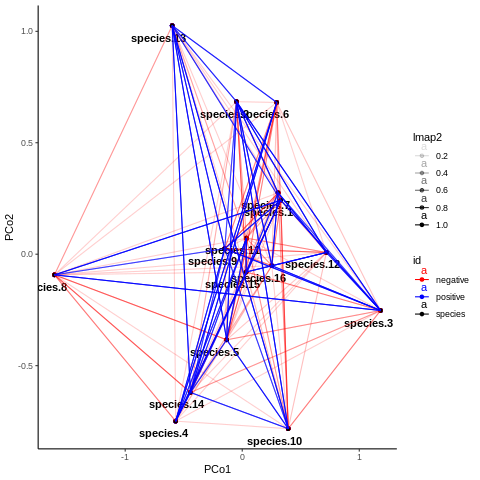

In [174]:
%%R
showIntrGraph(elap[[1]], sa, th=0.01, # <- Threshold for links to be displayed
              annot_adj=c(0.75, 2.00))

### Energy landscape analysis with environmental gradients

In [120]:
%%R
baseabtable <- read.csv('rELA/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('rELA/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")

In [121]:
%%R
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 1, c(0.01, 0.01, 0.99), 1, 0)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


In [122]:
# Parameter fitting including environmental parameters
%%R
sa <- runSA(ocmat=as.matrix(ocmat), enmat=as.matrix(enmat), qth=10^-5, rep=256, threads=1)

Start parameter fitting
................................................................................................................................................................................................................................................................SA: elapsed time 42.82 sec



In [123]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # Specify the label or position of an environmental factor
  enmat=enmat, env=NULL, range=NULL, steps=32, th=0.05, threads=2) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor

env not specified, the mean of enmat is used
processing(32) |================================|
Elapsed time 41.07 sec


NULL


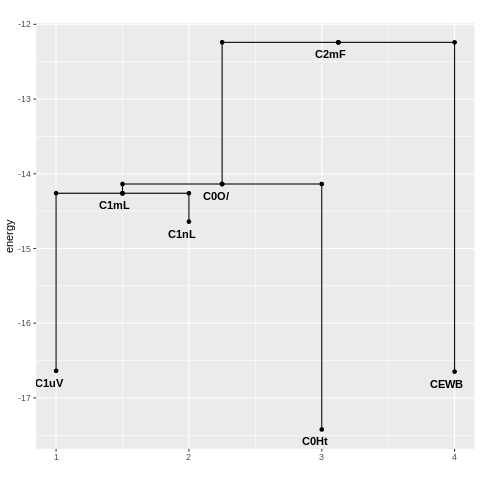

In [124]:
# Disconnectivity graph
%%R
showDG(gela[[1]][[1]][[1]], ocmat)

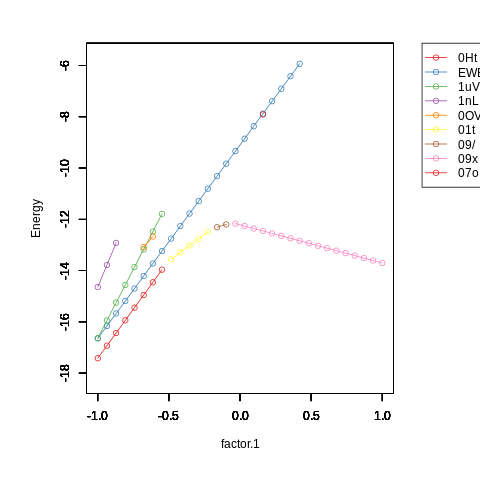

In [125]:
# Stable state diagram
%%R
showSSD(gela)

In [126]:
%%R
gstates <- foreach(x=gela[[1]], .combine='c') %do% {
    x[[1]][[1]]}
unique(gstates)

[1] "0Ht" "EWB" "1uV" "1nL" "0OV" "01t" "09/" "09x" "07o"


#### GradELA 3D plot

In [127]:
%%R
gelsobj <- GELSObj(gela, sa, threads=2)

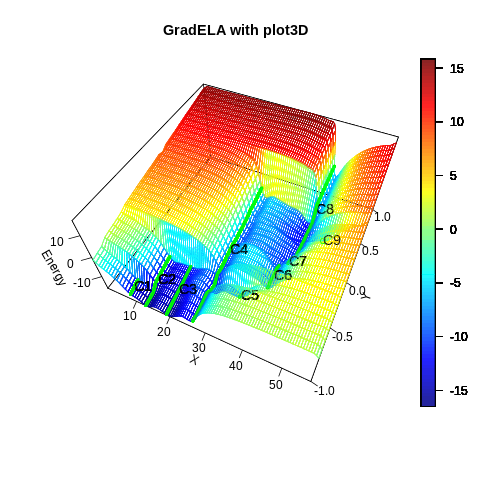

In [128]:
%%R
showGELA3D(gelsobj)

## Stability

In [129]:
%%R
baseabtable <- read.csv('rELA/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")
basemetadata <- read.csv('rELA/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
  column_to_rownames(., var = "X")

In [130]:
%%R
list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 1, c(0.01, 0.01, 0.99), 1, 0)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


In [131]:
# Parameter fitting including environmental parameters
%%R
sa <- runSA(ocmat=as.matrix(ocmat), enmat=as.matrix(enmat), qth=10^-5, rep=256, threads=1)

Start parameter fitting
................................................................................................................................................................................................................................................................SA: elapsed time 42.67 sec



In [132]:
%%R
stb <- Stability(sa, ocmat, enmat=NULL, threads=2)
head(stb, 5)

Start Stability:
sa obtained with enmat, but enmat is not given.
assigned a zero vector as the environmental condition for all data points.
Stability: elapsed time 23.62 sec

           energy.gap ss.entropy  e.realize  e.stable state.id stable.state.id
sample.1   10.8095267 0.06722154  -1.664103 -12.47363      07/             09x
sample.10   1.3163309 0.06017244 -11.157299 -12.47363      08/             09x
sample.100  6.0993012 0.31541909  -6.374328 -12.47363      1uF             09x
sample.101  0.5292536 0.04541469 -11.944376 -12.47363      09t             09x
sample.102  0.8394261 0.05291508 -11.634204 -12.47363      01t             09x


In [133]:
%%R
stbwe <- Stability(sa, ocmat, enmat=enmat, threads=2)
head(stbwe, 5)

Start Stability:
Stability: elapsed time 35.38 sec

           energy.gap ss.entropy  e.realize  e.stable state.id stable.state.id
sample.1    8.9272774 0.75890140  -7.697306 -16.62458      07/             0Ht
sample.10   2.1095409 0.07157006 -10.675861 -12.78540      08/             09x
sample.100  1.4778254 0.59511261 -15.133318 -16.61114      1uF             1uV
sample.101  0.3568032 1.04481629 -12.307661 -12.66446      09t             01t
sample.102  0.0347924 1.01193765 -13.584026 -13.61882      01t             0Ht


gStability returns a list of 4 elements: the first two are the dataframe for pruned/non-pruned energy landscape, respectively. In addition to the dataframe of Stability it includes e.tipping (energy of tipping point) and energy.barrier (height of energy from observed state to the tipping point).The third output is a list of parameters (h, g, j, h+g*env) and a summary table of stable states, and the fourth output is a list encapsulating the inputs required for the various plots.  
  
output of gStability:  
[[1]]: data.frame(energy.gap, ss.entropy, energy.barrier, e.realize, e.stable, e.tipping, state.id, stable.state.id)  
[[2]]: data.frame(energy.gap.np, ss.entropy.np, energy.barrier.np, e.realize, e.stable.np, e.tipping.np, state.id.np, stable.state.id.np)  
[[3]]: w/ enmat: list(list(list(he, je, ge, hge), data.frame(sstable)), ...); w/o enmat: list(list(he, je, ge, hge), data.frame(sstable))  
[[4]]: w/ enmat: list(list(ocmat, env, sa, ela, elanp), ...); w/o enmat: list(ocmat, env, sa, ela, elanp)

In [134]:
%%R
gstb <- gStability(sa, ocmat, enmat=NULL, threads=2)

Start gStability:
sa obtained with enmat, but enmat is not given.
assigned a zero vector as the environmental condition for all data points.
gStability: elapsed time 46.07 sec



In [135]:
%%R
gstb[[1]][1:8,]

           energy.gap ss.entropy energy.barrier  e.realize   e.stable e.tipping
sample.1   10.8095267 0.09377791       5.288210  -1.664103 -12.473630  -7.18542
sample.10   1.3163309 0.09377791       5.288210 -11.157299 -12.473630  -7.18542
sample.100  6.0993012 0.27783957       5.288210  -6.374328 -12.473630  -7.18542
sample.101  0.5292536 0.04541469       5.288210 -11.944376 -12.473630  -7.18542
sample.102  0.8394261 0.05291508       5.288210 -11.634204 -12.473630  -7.18542
sample.103  2.4240827 0.05291508       5.288210 -10.049547 -12.473630  -7.18542
sample.104  0.2942804 0.06017244       5.288210 -12.179349 -12.473630  -7.18542
sample.105  2.0538765 0.48773158       2.327612  -7.459156  -9.513032  -7.18542
           state.id stable.state.id
sample.1        07/             09x
sample.10       08/             09x
sample.100      1uF             09x
sample.101      09t             09x
sample.102      01t             09x
sample.103      0Ht             09x
sample.104      09/         

In [136]:
%%R
gstb[[2]][1:8,]

           energy.gap.np ss.entropy.np energy.barrier.np  e.realize e.stable.np
sample.1      10.8095267    0.03762236          5.288210  -1.664103  -12.473630
sample.10      1.3163309    0.09377791          5.288210 -11.157299  -12.473630
sample.100     6.0993012    0.26034063          5.288210  -6.374328  -12.473630
sample.101     0.5292536    0.05291508          5.288210 -11.944376  -12.473630
sample.102     0.8394261    0.03762236          5.288210 -11.634204  -12.473630
sample.103     2.4240827    0.07408838          5.288210 -10.049547  -12.473630
sample.104     0.2942804    0.02946405          5.288210 -12.179349  -12.473630
sample.105     2.0538765    0.45941303          2.327612  -7.459156   -9.513032
           e.tipping.np state.id.np stable.state.id.np
sample.1       -7.18542         07/                09x
sample.10      -7.18542         08/                09x
sample.100     -7.18542         1uF                09x
sample.101     -7.18542         09t                09x
sampl

In [137]:
%%R
gstbe <- gStability(sa, ocmat, enmat=enmat, th=0.2, threads=2)

Start gStability:
gStability: elapsed time 221.11 sec



In [138]:
%%R
length(gstbe[[4]])

[1] 256


In [139]:
%%R
gstbe[[1]][1:8,]

           energy.gap ss.entropy energy.barrier  e.realize   e.stable
sample.1    8.9272774 0.57022889       3.203604  -7.697306 -16.624584
sample.10   2.1095409 0.00000000            Inf -10.675861 -12.785402
sample.100  1.4778254 0.51401882       2.491998 -15.133318 -16.611143
sample.101  0.3568032 0.13578841       7.737454 -12.307661 -12.664464
sample.102  0.0347924 0.07408838       7.879676 -13.584026 -13.618819
sample.103  0.0000000 0.00000000       6.538182 -15.474339 -15.474339
sample.104  0.5939313 0.00000000            Inf -11.744471 -12.338403
sample.105  0.8740178 0.65079582       1.728333  -8.028727  -8.902745
            e.tipping state.id stable.state.id
sample.1   -13.420980      07/             0Ht
sample.10         Inf      08/             09x
sample.100 -14.119145      1uF             1uV
sample.101  -4.927010      09t             01t
sample.102  -5.739143      01t             0Ht
sample.103  -8.936158      0Ht             0Ht
sample.104        Inf      09/           

In [140]:
%%R
gstbe[[2]][1:8,]

           energy.gap.np ss.entropy.np energy.barrier.np  e.realize e.stable.np
sample.1    8.927277e+00    0.71603066         3.2036039  -7.697306  -16.624584
sample.10   2.109541e+00    0.07485702         5.6837795 -10.675861  -12.785402
sample.100  1.477825e+00    0.58539718         2.4919983 -15.133318  -16.611143
sample.101  3.568032e-01    1.04479789         0.3568032 -12.307661  -12.664464
sample.102  3.479240e-02    1.00003320         0.6913287 -13.584026  -13.618819
sample.103 -1.776357e-15    0.05026945         2.5130890 -15.474339  -15.474339
sample.104  5.939313e-01    0.14144039         4.0625185 -11.744471  -12.338403
sample.105  8.740178e-01    0.64401225         1.7283326  -8.028727   -8.902745
           e.tipping.np state.id.np stable.state.id.np
sample.1     -13.420980         07/                0Ht
sample.10     -7.101623         08/                09x
sample.100   -14.119145         1uF                1uV
sample.101   -12.307661         09t                01t
sampl

===================================================================================

In [141]:
## list(he,je,ge,hge)
%%R
sample.id <- 1
gstbe[[3]][[sample.id]][[1]]
# if enmat=NULL, remove "[[sample.id]]"

[[1]]
 species.12  species.16   species.7   species.5   species.2  species.10 
-0.71733902 -0.45247064 -0.44030707 -0.27096446 -1.07839162 -1.32682918 
  species.8  species.11  species.15   species.6   species.4  species.14 
 0.22606726 -0.55673111 -0.39420383 -0.10700258  1.30145207  0.23369818 
  species.3  species.13   species.1   species.9 
 0.01520675 -0.23278410  0.78737860  0.99569871 

[[2]]
           species.12 species.16  species.7   species.5   species.2  species.10
species.12  0.0000000  1.6013001  1.5777431 -0.99455751  1.17202067 -1.15695659
species.16  1.6013001  0.0000000  1.3243731 -1.06979274  0.83231112 -1.30680998
species.7   1.5777431  1.3243731  0.0000000 -1.08253066  0.77796402 -0.94924055
species.5  -0.9945575 -1.0697927 -1.0825307  0.00000000  1.33276115  0.30386532
species.2   1.1720207  0.8323111  0.7779640  1.33276115  0.00000000  0.29525710
species.10 -1.1569566 -1.3068100 -0.9492406  0.30386532  0.29525710  0.00000000
species.8  -2.0876054 -1.5403932 -1.4

In [142]:
## stablestates
%%R
sample.id <- 100
gstbe[[3]][[sample.id]][[2]]
# if enmat=NULL, remove "[[sample.id]]

   ID            Energy species.12 species.16 species.7 species.5 species.2
1 09x -13.6733467410491          0          0         0         0         0
  species.10 species.8 species.11 species.15 species.6 species.4 species.14
1          0         1          0          0         1         1          1
  species.3 species.13 species.1 species.9
1         1          0         1         1


In [143]:
%%R
length(gstbe[[4]][[1]][[4]][[1]][[1]])

[1] 3


In [144]:
%%R
sapply(seq(256), function(x) {length(gstbe[[4]][[x]][[4]][[1]][[1]]) - length(gstbe[[4]][[x]][[5]][[1]])})

  [1] -2 -3 -1 -2 -3 -2 -3 -1 -1 -2 -1 -1 -1 -3 -3 -1 -1 -2 -2 -2 -2  0 -2 -3 -3
 [26]  0 -1 -2 -4 -2  0 -3 -2 -2 -3 -2 -3 -2  0 -2 -2 -3 -2 -2 -3 -3 -3 -2 -1 -2
 [51] -3 -2  0 -2 -1 -1 -3 -2 -3 -2 -2 -3 -1 -3 -2 -2 -4 -3 -2 -3 -1 -2 -1 -2  0
 [76] -3 -2 -3 -2 -3 -4 -3  0 -4 -1 -1 -1 -3 -1 -3 -1 -1 -1 -1  0 -2 -3 -2 -2  0
[101] -2 -1 -2  0 -1 -2 -3 -2 -2  0 -4 -3  0 -2 -2 -3 -4 -2 -3 -1 -4 -1 -2 -2 -2
[126] -2 -3 -3 -4 -1 -2 -1 -2 -2 -4 -2 -3 -3 -3  0 -1 -1 -2 -3  0 -3 -4 -2 -2 -4
[151] -3  0 -3 -1 -2 -3 -1 -2 -2 -1 -3 -2 -3 -4 -2 -1 -3  0 -3 -1  0 -1 -2 -2 -3
[176] -2 -4 -3 -2 -1 -1  0 -4 -3 -1 -3 -3 -4 -3 -3 -3 -2 -2 -2 -2 -2 -2 -3 -1 -2
[201] -2 -3 -3 -4 -3 -3 -1 -3 -3 -2 -3 -3 -5 -2 -2 -2 -1 -3 -2 -3 -3 -2 -1 -1 -3
[226]  0 -2 -1 -1 -3 -3 -2 -3 -1 -1 -4 -1 -3  0 -2 -3  0 -3 -2 -2 -3  0 -1 -4 -4
[251] -3 -3 -3 -1 -3 -3


In [145]:
%%R
ela <- gstbe[[4]][[sample.id]][[4]]
ela

[[1]]
[[1]][[1]]
[1] "09x"

[[1]][[2]]
[1] -13.67335

[[1]][[3]]
[[1]][[3]]$`1`
[1] "Inf"


[[1]][[4]]
[[1]][[4]]$`1`
[1] Inf



[[2]]
  ss.before.pruning ss.after.pruning
1               09x              09x



In [146]:
%%R
elanp <- gstbe[[4]][[sample.id]][[5]]
elanp

[[1]]
[1] "09x"

[[2]]
[1] -13.67335

[[3]]
[[3]]$`1`
[1] "Inf"


[[4]]
[[4]]$`1`
[1] Inf




NULL


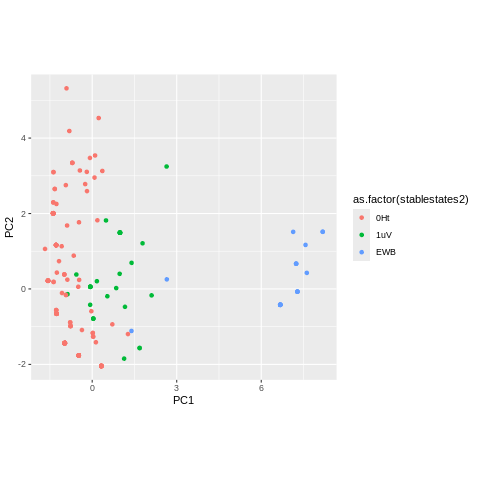

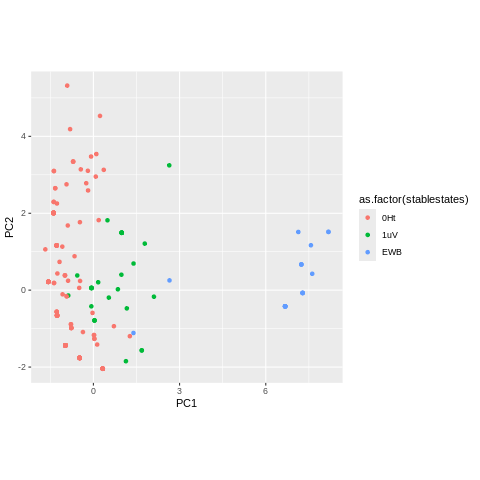

In [147]:
## PCplot
%%R
sample.id <- 1
ocmat <- gstbe[[4]][[sample.id]][[1]]
env <- gstbe[[4]][[sample.id]][[2]]
sa <- gstbe[[4]][[sample.id]][[3]]
ela <- gstbe[[4]][[sample.id]][[4]]
# if enmat=NULL, remove "[[sample.id]]"

PCplot(ocmat, sa, env, ssrep=ela[[2]])
PCplot(ocmat, sa, env, ssrep=ela[[2]], pruned=FALSE)

NULL


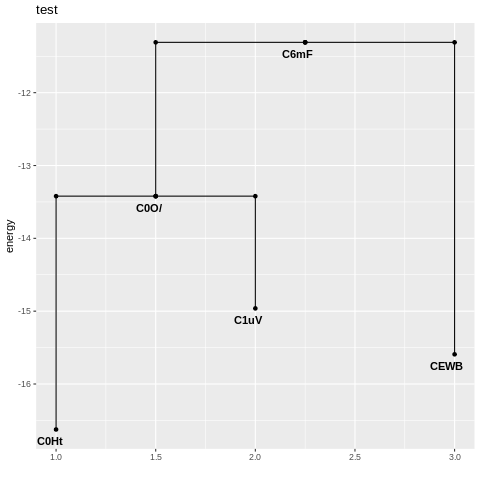

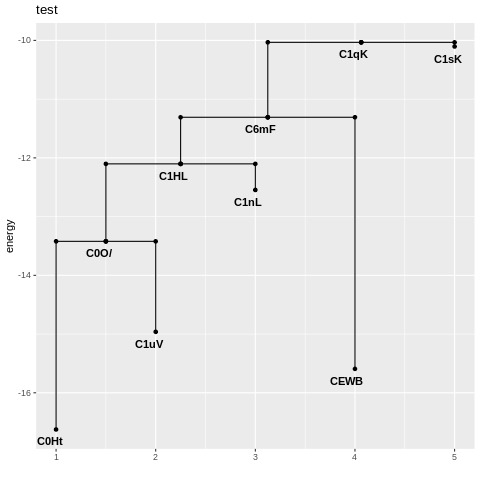

In [148]:
%%R
sample.id <- 1
ocmat <- gstbe[[4]][[sample.id]][[1]]
ela <- gstbe[[4]][[sample.id]][[4]]
elanp <- gstbe[[4]][[sample.id]][[5]]
# if enmat=NULL, remove "[[sample.id]]"

showDG(ela[[1]], ocmat, "test")
showDG(elanp, ocmat, "test")